# Tides: Yakutat

In [1]:
#import essential libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#parameter to use Latex in matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#a plot label should be easy to read
plt.rcParams.update({'font.size': 14})

#interpolation
from scipy.interpolate import interp1d
#find the peaks
from scipy.signal import argrelextrema

## Preliminary analysis

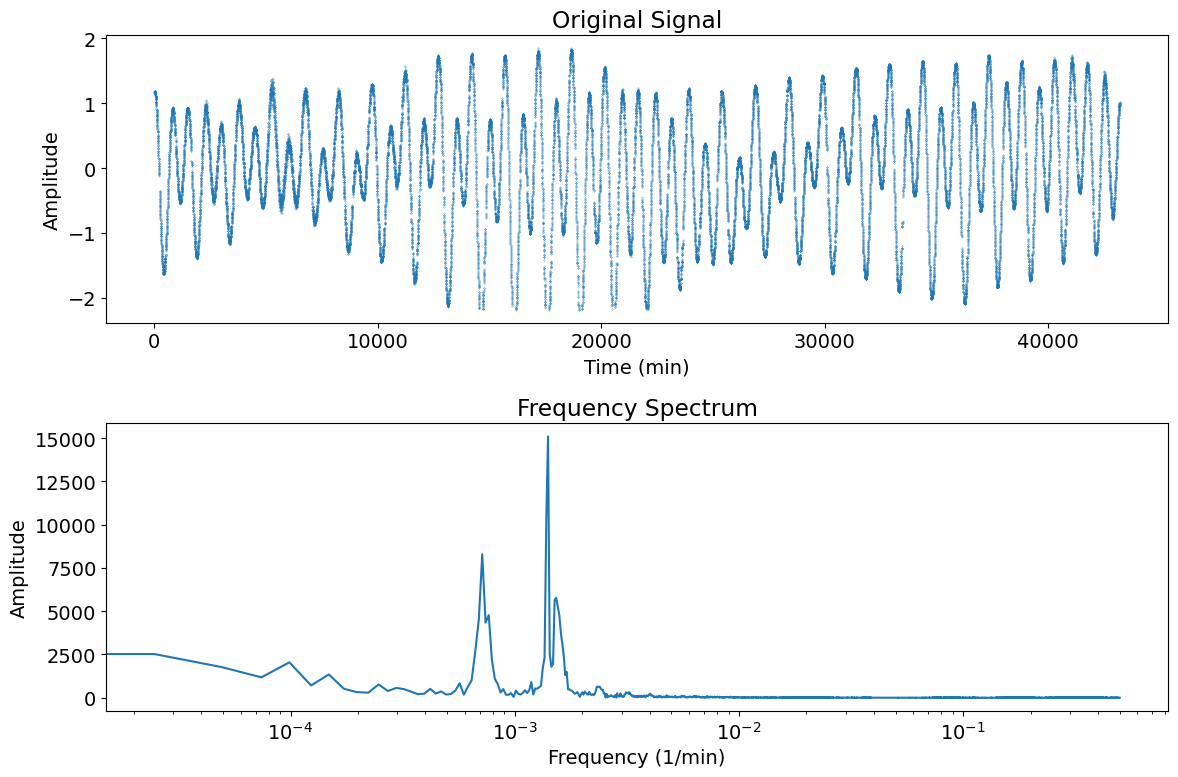

In [2]:
data=np.loadtxt("Yakutat.txt")
signal = data[:,0] - np.mean(data[:,0])
t= data[:,1] -data[0,1]

#remove outliers/noise
#t= t[signal>-1.2]
#signal = signal[signal>-1.2]
# no mask needed
#exclude_values = 
#mask = np.isin(signal, exclude_values, invert=True)
#t = t[mask]
#signal = signal[mask]

# Perform DFT using FFT
fft_result = np.fft.fft(signal)
freq_axis = np.fft.fftfreq(len(signal))

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot the original signal
axs[0].scatter(t, signal, s=0.05)
#axs[0].set_xlim(0,2000)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time (min)')
axs[0].set_ylabel('Amplitude')

# Plot the frequency spectrum
axs[1].plot(freq_axis[:len(signal)//2], np.abs(fft_result[:len(signal)//2]))
axs[1].set_xscale('log')
axs[1].set_title('Frequency Spectrum')
axs[1].set_xlabel('Frequency (1/min)')
axs[1].set_ylabel('Amplitude')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## With interpolation

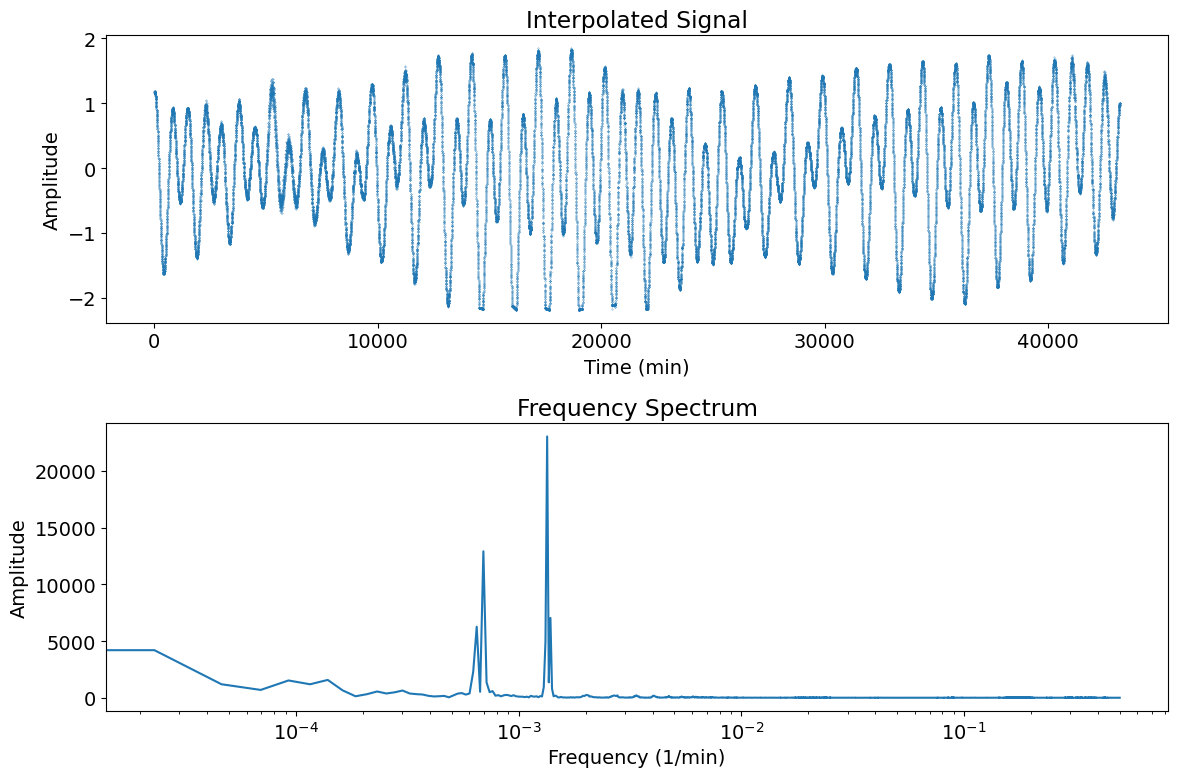

In [4]:
data=np.loadtxt("Yakutat.txt")
signal = data[:,0] - np.mean(data[:,0])
t= data[:,1] -data[0,1]

#remove outliers/noise
#t= t[signal>-1.2]
#signal = signal[signal>-1.2]
# no mask needed
#exclude_values = 
#mask = np.isin(signal, exclude_values, invert=True)
#t = t[mask]
#signal = signal[mask]

#drop the last point since it's beyond one month
t = t[:-1]
signal = signal[:-1]

# Perform linear interpolation
linear_interpolator = interp1d(t.astype(int), signal, kind='linear', fill_value="extrapolate")
interpolated_t = np.arange(43200)
interpolated_signal = linear_interpolator(interpolated_t)

# Perform DFT using FFT
fft_result = np.fft.fft(interpolated_signal)
freq_axis = np.fft.fftfreq(len(interpolated_signal))

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot the original signal
axs[0].scatter(interpolated_t, interpolated_signal, s=0.05)
#axs[0].set_xlim(0,2000)
axs[0].set_title('Interpolated Signal')
axs[0].set_xlabel('Time (min)')
axs[0].set_ylabel('Amplitude')

# Plot the frequency spectrum
axs[1].plot(freq_axis[:len(interpolated_signal)//2], np.abs(fft_result[:len(interpolated_signal)//2]))
axs[1].set_xscale('log')
axs[1].set_title('Frequency Spectrum')
axs[1].set_xlabel('Frequency (1/min)')
axs[1].set_ylabel('Amplitude')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [5]:
# Combine the arrays into a single 2D array
combined_array = np.column_stack((interpolated_t, interpolated_signal, freq_axis, np.abs(fft_result)))

# Define the file path
file_path = 'YakutatResults.txt'

# Save the combined array to a text file
np.savetxt(file_path, combined_array, fmt='%1.10f', delimiter='\t', header='times \t signal \t freqs \t dft', comments='')

### the peaks

In [10]:
data = np.abs(fft_result[:len(interpolated_signal)//2])

# Find the indices of the relative maxima
maxima_indices = argrelextrema(data, np.greater)[0]

# Filter the indices of maxima that are greater than 500
indices_greater_than = maxima_indices[data[maxima_indices] > 1000]

# Access the actual values at the maxima indices
maxima_values = data[indices_greater_than]

print("Indices of maxima:", indices_greater_than)
print("Values at maxima:", maxima_values)

Indices of maxima: [ 1  4  6 28 30 58 60]
Values at maxima: [ 4194.08288321  1524.80003476  1573.70240824  6261.84404438
 12914.09504784 23036.90702202  7038.17619243]


In [12]:

peak_indices = [ 1 , 4 , 6 ,28 ,30 ,58 ,60]
frequencies = freq_axis[:len(interpolated_signal)//2]
print(frequencies[peak_indices])
peak_freq=frequencies[peak_indices]

[2.31481481e-05 9.25925926e-05 1.38888889e-04 6.48148148e-04
 6.94444444e-04 1.34259259e-03 1.38888889e-03]


In [13]:
period = 1 /( peak_freq) /60 #hours
print(period)

[720.         180.         120.          25.71428571  24.
  12.4137931   12.        ]
